# Camino mínimo entre grafos

In [1]:
%matplotlib inline
import timeit
import matplotlib.pyplot as plt
import numpy as np

from graph import create_grid_graph
from bfs import BFS
from dijkstra import Dijkstra
from heuristic import Heuristic
from a_star import A_Star

In [4]:
def plot_algorithms(algorithms, maxiter=101, step=10, number=3, title=''):
    for alg in algorithms:
        # Los algoritmos pueden ser tuplas: (algoritmo, heuristica)
        heuristic = None
        if isinstance(alg, tuple):
            heuristic = alg[1]
            alg = alg[0]
        x, y = [], []
        for n in range(10, maxiter, step):
            max_node = n * n
            times = []
            for i in range(number):
                g, h = create_grid_graph(n, n)
                path = alg(g, 0, max_node-1, heuristic or h, search=False)
                timer = timeit.Timer(path.search)
                times.append(timer.timeit(1))
            t = np.mean(times)
            y.append(t)
            x.append(max_node)
        plt.plot(x, y, label=alg.__name__)

    plt.title(title)
    plt.ylabel('Tiempo de ejecución')
    plt.xlabel('Cantidad de nodos')
    plt.legend(loc='upper left', prop={'size': 10})
#     if savefig:
#         # el nombre del archivo es: como son los elementos, iteraciones, k, cantidad de algoritmos
#         filename = '_'.join([items_getter.__name__, '2', str(maxiter), k_func.__name__, str(len(modules)), 'algs'])
#         plt.savefig('images/' + filename + '.png', bbox_inches='tight')
    plt.show()

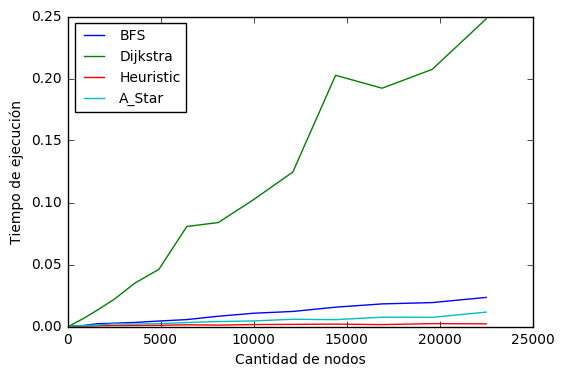

In [7]:
plot_algorithms([BFS, Dijkstra, Heuristic, A_Star], maxiter=151)